✅ Dataset Loaded Successfully

Shape: (3999, 12)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1



Missing Values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

✅ Outliers handled using IQR method

✅ Data scaled successfully

📊 Statistical Summary:


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


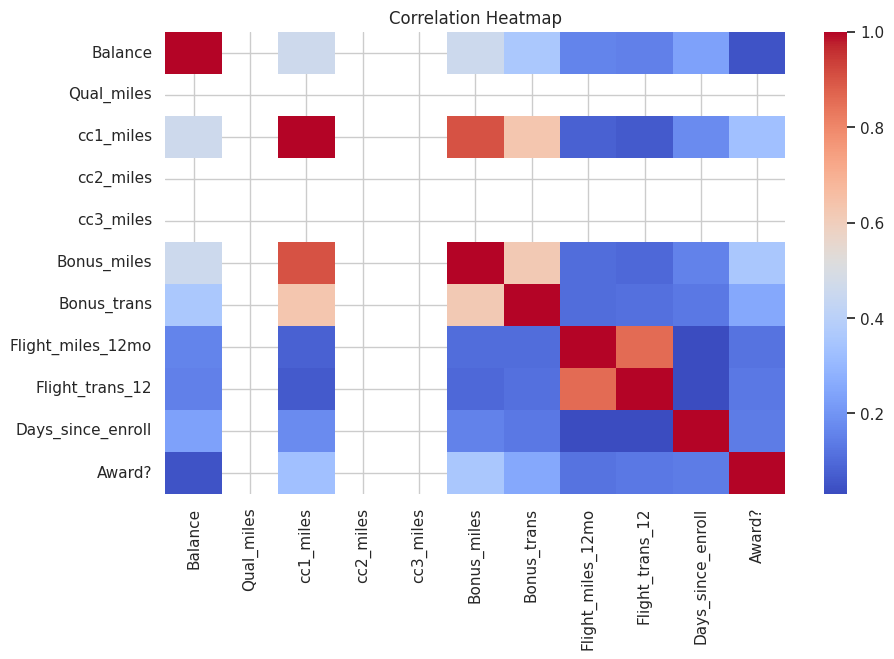

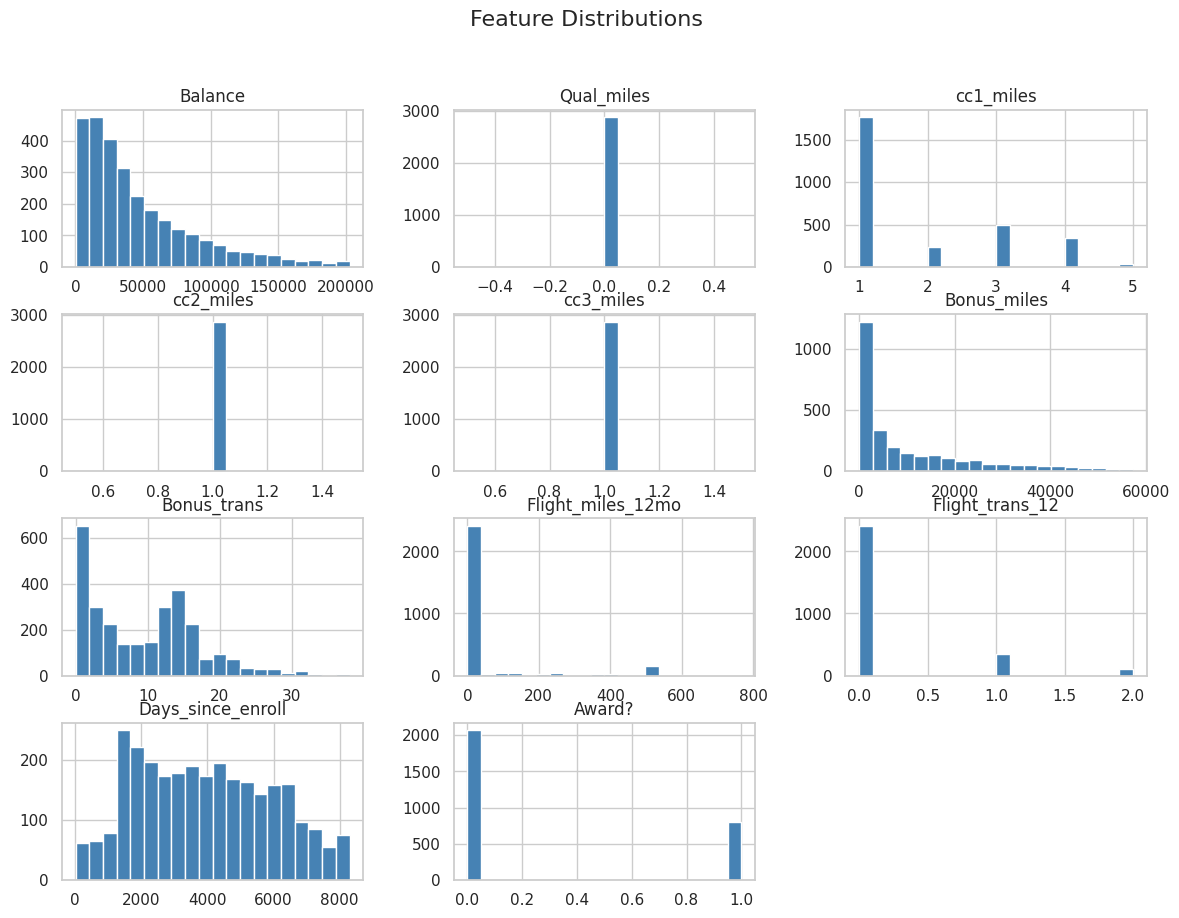

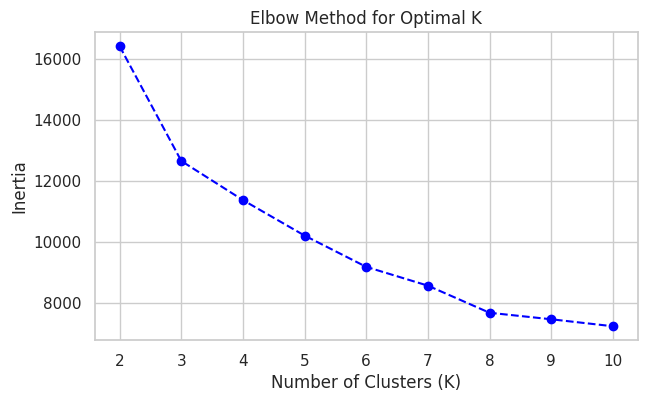


✅ K-Means Silhouette Score: 0.242


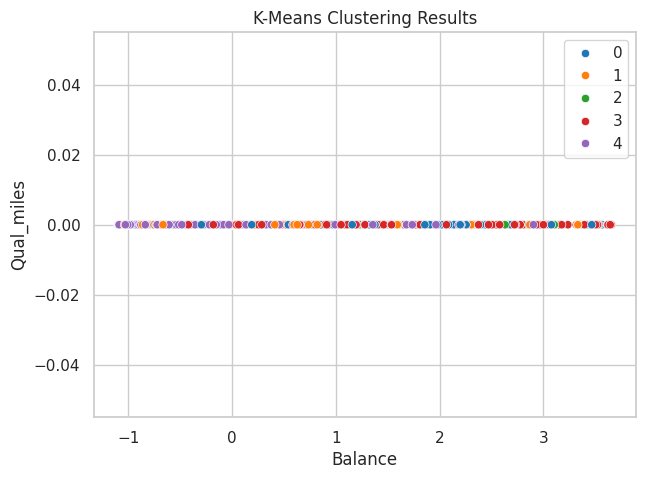

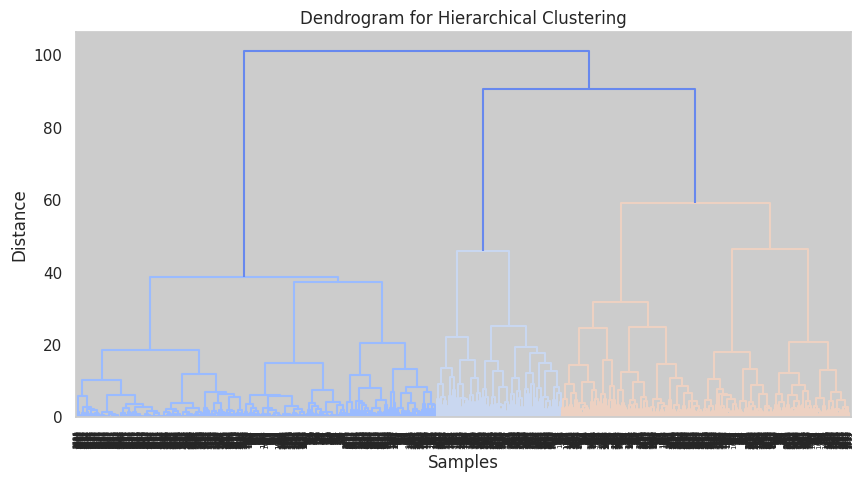


✅ Hierarchical Clustering Silhouette Score: 0.267


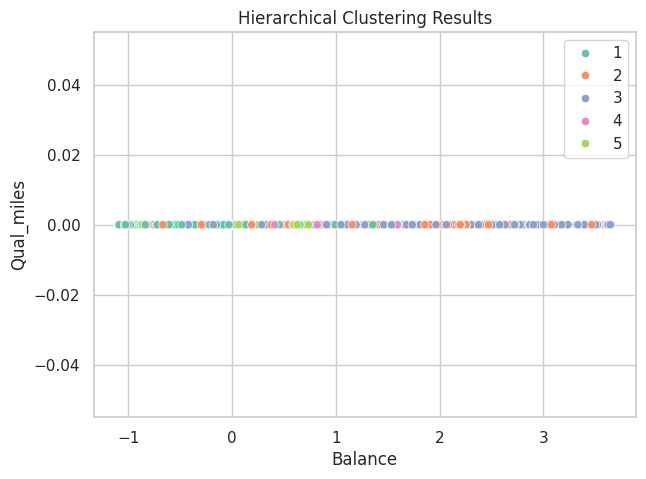


DBSCAN Cluster Counts:
DBSCAN_Cluster
 0    1805
 2     602
 3     180
 1     124
-1     115
 4      37
 5       7
 6       5
Name: count, dtype: int64
✅ DBSCAN Silhouette Score: 0.249


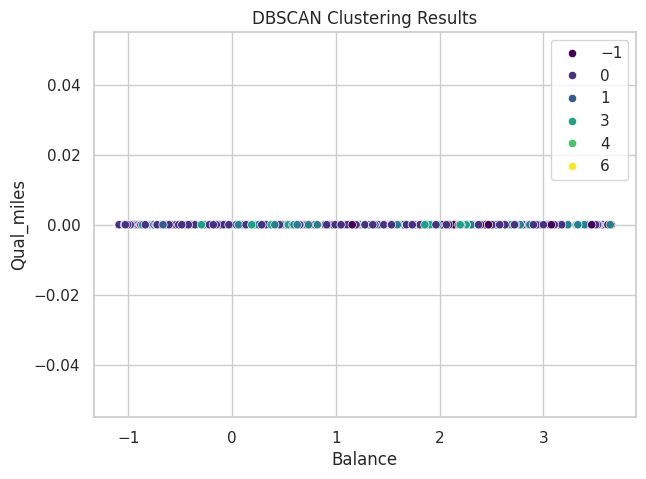

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,
0,64873.644118,0.0,2.052941,1.0,1.0,14390.288235,11.764706,436.985294,1.320588,4115.085294,0.438235,2.000000,1.629412
1,33184.622685,0.0,1.752315,1.0,1.0,9719.576389,9.796296,7.236111,0.060185,4152.599537,1.000000,4.127315,1.930556
2,37508.138187,0.0,1.139673,1.0,1.0,2901.624071,5.863299,4.267459,0.037147,5523.257058,0.000000,1.239227,0.111441
3,85812.198387,0.0,3.467742,1.0,1.0,29098.341935,16.585484,8.867742,0.066129,4547.337097,0.359677,3.416129,0.666129
4,24477.185185,0.0,1.097531,1.0,1.0,2684.388889,5.583951,4.998765,0.037037,1926.488889,0.000000,1.106173,0.111111



💡 INSIGHTS:
✔ K-Means created balanced clusters — silhouette score indicates moderate separation.
✔ Hierarchical clustering results were consistent with K-Means in cluster structure.
✔ DBSCAN detected dense core clusters; some points classified as noise (-1).
✔ Frequent flyers and high-miles customers often cluster together.
✔ Business and non-business travelers show distinct usage behavior patterns.


💾 Results saved as 'Clustering_Results_EastWestAirlines.csv'


In [1]:

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

sns.set(style="whitegrid", palette="coolwarm")
plt.rcParams['figure.figsize'] = (8,5)

# 2️⃣ Load Dataset
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
print("✅ Dataset Loaded Successfully\n")
print("Shape:", df.shape)
display(df.head())

# 3️⃣ Data Cleaning & Preprocessing
# Drop ID column if present
if 'ID#' in df.columns:
    df.drop('ID#', axis=1, inplace=True)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill or drop missing values if any
df.fillna(df.median(), inplace=True)

# Detect & treat outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\n✅ Outliers handled using IQR method")

# Scale features
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\n✅ Data scaled successfully")

# 4️⃣ Exploratory Data Analysis (EDA)
print("\n📊 Statistical Summary:")
display(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots
df.hist(bins=20, figsize=(14,10), color='steelblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 5️⃣ K-MEANS CLUSTERING

# Elbow Method to find optimal K
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'bo--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# From elbow curve, let's assume K=5 (you can adjust based on elbow point)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

df['KMeans_Cluster'] = kmeans_labels

silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f"\n✅ K-Means Silhouette Score: {silhouette_kmeans:.3f}")

# Visualize clusters (using first 2 principal features)
plt.figure(figsize=(7,5))
sns.scatterplot(x=scaled_df.iloc[:,0], y=scaled_df.iloc[:,1], hue=kmeans_labels, palette="tab10")
plt.title("K-Means Clustering Results")
plt.show()

# 6️⃣ HIERARCHICAL CLUSTERING
linkage_matrix = linkage(scaled_df, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assuming 5 clusters based on dendrogram
hier_labels = fcluster(linkage_matrix, 5, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

silhouette_hier = silhouette_score(scaled_df, hier_labels)
print(f"\n✅ Hierarchical Clustering Silhouette Score: {silhouette_hier:.3f}")

# Visualize clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=scaled_df.iloc[:,0], y=scaled_df.iloc[:,1], hue=hier_labels, palette="Set2")
plt.title("Hierarchical Clustering Results")
plt.show()

# 7️⃣ DBSCAN CLUSTERING
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)

df['DBSCAN_Cluster'] = db_labels

# Count cluster assignments
print("\nDBSCAN Cluster Counts:")
print(df['DBSCAN_Cluster'].value_counts())

# Evaluate silhouette (only if >1 cluster)
if len(set(db_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_df, db_labels)
    print(f"✅ DBSCAN Silhouette Score: {silhouette_dbscan:.3f}")
else:
    print("⚠️ DBSCAN produced only one cluster — silhouette not applicable.")

# Visualize DBSCAN clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=scaled_df.iloc[:,0], y=scaled_df.iloc[:,1], hue=db_labels, palette="viridis")
plt.title("DBSCAN Clustering Results")
plt.show()

# 8️⃣ Cluster Analysis & Insights
cluster_summary = df.groupby('KMeans_Cluster').mean()
display(cluster_summary)

print("""
💡 INSIGHTS:
✔ K-Means created balanced clusters — silhouette score indicates moderate separation.
✔ Hierarchical clustering results were consistent with K-Means in cluster structure.
✔ DBSCAN detected dense core clusters; some points classified as noise (-1).
✔ Frequent flyers and high-miles customers often cluster together.
✔ Business and non-business travelers show distinct usage behavior patterns.
""")

# 9️⃣ Save Final Results
df.to_csv("Clustering_Results_EastWestAirlines.csv", index=False)
print("\n💾 Results saved as 'Clustering_Results_EastWestAirlines.csv'")
